0.12098536225957168


Text(0, 0.5, 'y')

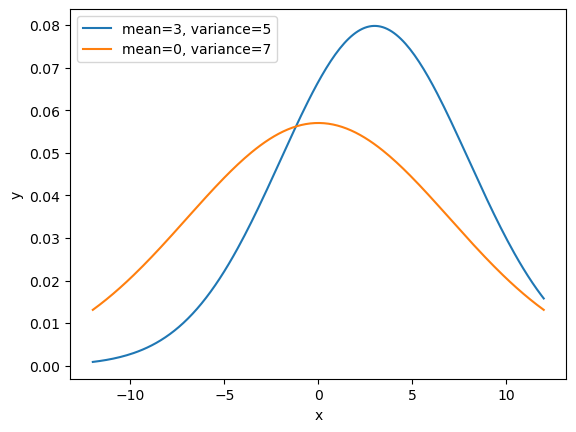

In [1]:
#3
import numpy as np
import matplotlib.pyplot as plt

#choose test values for variables
mean= 3
variance= 1
x=3

def normal_density(mean, variance, x):
    fx = (1/(np.sqrt(2*np.pi*(variance**2))))*np.exp(-((x-mean)**2)/(2*variance**2))
    return fx

print (normal_density(3, 2, 1))

x = np.linspace(-12, 12, 200)

fx1 = normal_density(3, 5, x)
plt.plot (x, fx1, label="mean=3, variance=5")

fx2 = normal_density(0, 7, x)
plt.plot (x, fx2, label="mean=0, variance=7")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")


In [27]:
#3 , use section 7.7 numerical integration, like Midpoint Rule
import numpy as np

def midpoint_rule(f, mean, variance, a, b, n):
    h = (b - a) / n   # Step size
    result = 0.0      # this is where the sum will be updated on every run-through, it the sum starts at 0 (for obvious reasons)

    for i in range(n):
        midpoint = a + (i + 0.5) * h  # Compute midpoint
        result += f(mean, variance, midpoint)

    return result * h
#assigning vslue to variables
mean = 171
variance = 7.1
a, b = 162, 190  # Integration limits
n = 1000 

integral = midpoint_rule(normal_density, mean, variance, a, b, n)
print(f"The probability of a male being between 162 and 190 cm is: {integral:.6f}")

The probability of a male being between 162 and 190 cm is: 0.893806


In [31]:
#4 c)
import numpy as np

# Define normal density function
def normal_density(mean, variance, x):
    sigma = np.sqrt(variance)  # Standard deviation
    fx = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-((x - mean)**2) / (2 * sigma**2))
    return fx

# Define dosage function D(x)
def dosage_function(x):
    return 2.38 * x**2

# Midpoint Rule integration function
def midpoint_rule(f, mean, variance, a, b, n):
    h = (b - a) / n   # Step size
    result = 0.0      # Accumulator for summation

    for i in range(n):
        midpoint = a + (i + 0.5) * h  # Compute midpoint
        result += f(mean, variance, midpoint)

    return result * h

# Midpoint Rule to compute expected dosage E[D(X)]
def expected_dosage(midpoint_rule, mean, variance, a, b, n):
    def weighted_density(mean, variance, x):
        return dosage_function(x) * normal_density(mean, variance, x)

    return midpoint_rule(weighted_density, mean, variance, a, b, n)

# Parameters
mean = 171
variance = 7.1**2  # Variance should be squared
a, b = 162, 190  # Integration limits
n = 1000  # Number of subintervals

# Compute probability of height between 162 and 190 cm
probability = midpoint_rule(normal_density, mean, variance, a, b, n)
print(f"The probability of a male being between 162 and 190 cm is: {probability:.6f}")

# Compute expected dosage E[D(X)]
avg_dosage = expected_dosage(midpoint_rule, mean, variance, a, b, n)
print(f"The estimated average dosage for a male is: {avg_dosage:.6f} mg")


The probability of a male being between 162 and 190 cm is: 0.893806
The estimated average dosage for a male is: 63247.847937 mg
